In [2]:
# Data processing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# models
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, VALID_METRICS
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Utils
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

Wczytanie danych

In [3]:
attribute_names = ['id', 'RI', 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO', 'BaO', 'Fe2O3', 'Type']
dataframe = pd.read_csv('glass.data', header=None, names=attribute_names)
dataframe = dataframe.drop(columns=['id'])
print(dataframe.describe)

<bound method NDFrame.describe of           RI   Na2O   MgO  Al2O3   SiO2   K2O   CaO   BaO  Fe2O3  Type
0    1.52101  13.64  4.49   1.10  71.78  0.06  8.75  0.00    0.0     1
1    1.51761  13.89  3.60   1.36  72.73  0.48  7.83  0.00    0.0     1
2    1.51618  13.53  3.55   1.54  72.99  0.39  7.78  0.00    0.0     1
3    1.51766  13.21  3.69   1.29  72.61  0.57  8.22  0.00    0.0     1
4    1.51742  13.27  3.62   1.24  73.08  0.55  8.07  0.00    0.0     1
..       ...    ...   ...    ...    ...   ...   ...   ...    ...   ...
209  1.51623  14.14  0.00   2.88  72.61  0.08  9.18  1.06    0.0     7
210  1.51685  14.92  0.00   1.99  73.06  0.00  8.40  1.59    0.0     7
211  1.52065  14.36  0.00   2.02  73.42  0.00  8.44  1.64    0.0     7
212  1.51651  14.38  0.00   1.94  73.61  0.00  8.48  1.57    0.0     7
213  1.51711  14.23  0.00   2.08  73.36  0.00  8.62  1.67    0.0     7

[214 rows x 10 columns]>


Analiza danych

In [4]:
print(dataframe.info())
lack_of_data_name = 'N/D'
train_isna = pd.DataFrame(dataframe.isna().sum(), columns=[lack_of_data_name])
train_isna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na2O    214 non-null    float64
 2   MgO     214 non-null    float64
 3   Al2O3   214 non-null    float64
 4   SiO2    214 non-null    float64
 5   K2O     214 non-null    float64
 6   CaO     214 non-null    float64
 7   BaO     214 non-null    float64
 8   Fe2O3   214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


,N/D
RI,0
Na2O,0
MgO,0
Al2O3,0
SiO2,0
K2O,0
CaO,0
BaO,0
Fe2O3,0
Type,0


Liczność wystąpowania molekuł

      Na2O   MgO  Al2O3   SiO2   K2O   CaO   BaO  Fe2O3
0    13.64  4.49   1.10  71.78  0.06  8.75  0.00    0.0
1    13.89  3.60   1.36  72.73  0.48  7.83  0.00    0.0
2    13.53  3.55   1.54  72.99  0.39  7.78  0.00    0.0
3    13.21  3.69   1.29  72.61  0.57  8.22  0.00    0.0
4    13.27  3.62   1.24  73.08  0.55  8.07  0.00    0.0
..     ...   ...    ...    ...   ...   ...   ...    ...
209  14.14  0.00   2.88  72.61  0.08  9.18  1.06    0.0
210  14.92  0.00   1.99  73.06  0.00  8.40  1.59    0.0
211  14.36  0.00   2.02  73.42  0.00  8.44  1.64    0.0
212  14.38  0.00   1.94  73.61  0.00  8.48  1.57    0.0
213  14.23  0.00   2.08  73.36  0.00  8.62  1.67    0.0

[214 rows x 8 columns]


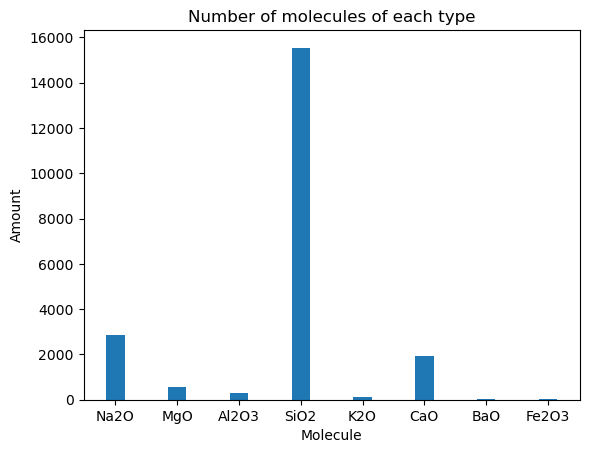

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Na2O    214 non-null    float64
 1   MgO     214 non-null    float64
 2   Al2O3   214 non-null    float64
 3   SiO2    214 non-null    float64
 4   K2O     214 non-null    float64
 5   CaO     214 non-null    float64
 6   BaO     214 non-null    float64
 7   Fe2O3   214 non-null    float64
dtypes: float64(8)
memory usage: 13.5 KB
None


In [5]:
dataframe_molecules = dataframe.drop(['Type', 'RI'], axis=1)
glass_types = {1: 'building_windows_float_processed',
               2 : 'building_windows_non_float_processed',
               3 : 'vehicle_windows_float_processed',
               4 : 'vehicle_windows_non_float_processed',
               5 : 'containers',
               6 : 'tableware',
               7 : 'headlamps'}
print(dataframe_molecules)
plt.bar(x=dataframe_molecules.columns, height=dataframe_molecules.sum(), width=0.3)
plt.title('Number of molecules of each type')
plt.xlabel('Molecule')
plt.ylabel('Amount')
plt.show()

print(dataframe_molecules.info())

Wykresy pudełkowe cząsteczek względem typów szkła

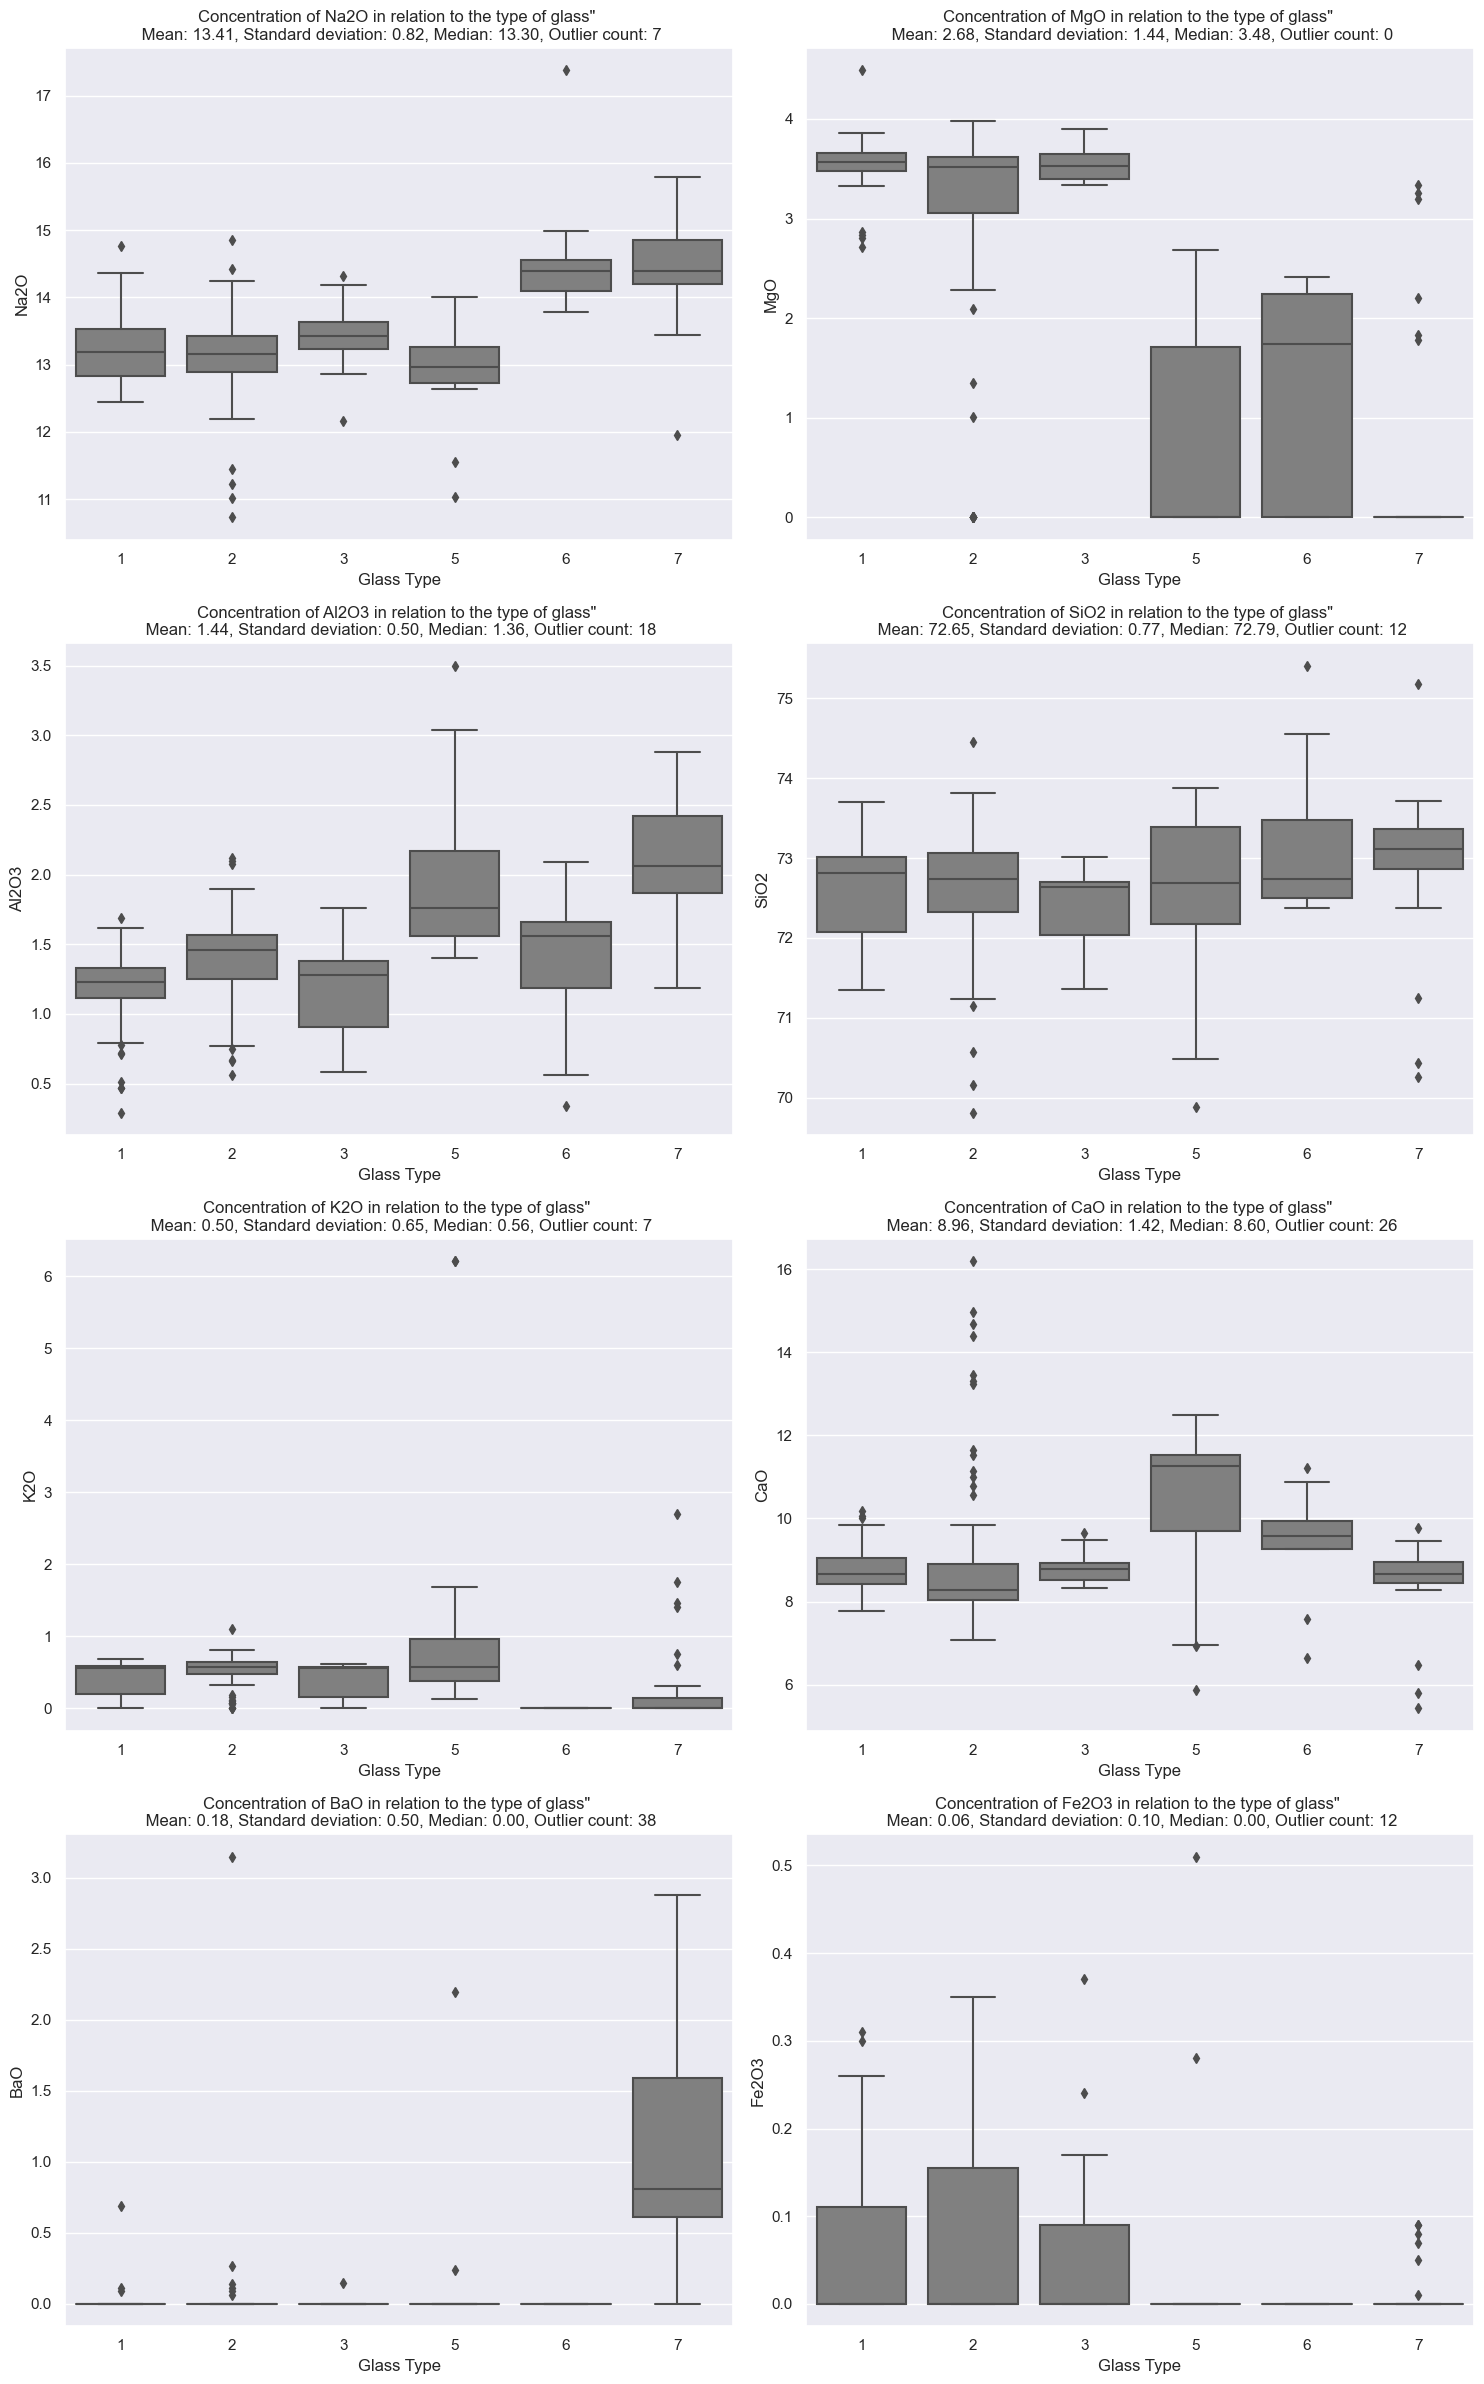

In [6]:
import math

sns.set(style="darkgrid")
fig, sub_plots = plt.subplots(nrows=math.ceil(dataframe_molecules.shape[1] / 2), ncols=2, figsize=(15, 6*math.ceil(dataframe_molecules.shape[1] / 2)))

for i, col in enumerate(dataframe_molecules.columns):
    sub_plot = sub_plots[i // 2, i % 2]
    sns.boxplot(data=dataframe, x='Type', y=col, ax=sub_plot, color='gray')
    sub_plot.set_xlabel(f'Glass Type')
    sub_plot.set_ylabel(col)
    desciption = dataframe[col].describe()
    
    #print(desciption)
    outliers = dataframe[(dataframe_molecules[col] < (desciption['25%'] - 1.5 * (desciption['75%'] - desciption['25%']))) | 
                         (dataframe_molecules[col] > (desciption['75%'] + 1.5 * (desciption['75%'] - desciption['25%'])))]

    sub_plot.set_title(f'Concentration of {col} in relation to the type of glass" \n Mean: {desciption["mean"]:.2f}, Standard deviation: {desciption["std"]:.2f}, Median: {desciption["50%"]:.2f}, Outlier count: {len(outliers)}')
plt.tight_layout()
plt.show()

Mapa ciepła pomiędzy cząsteczkami

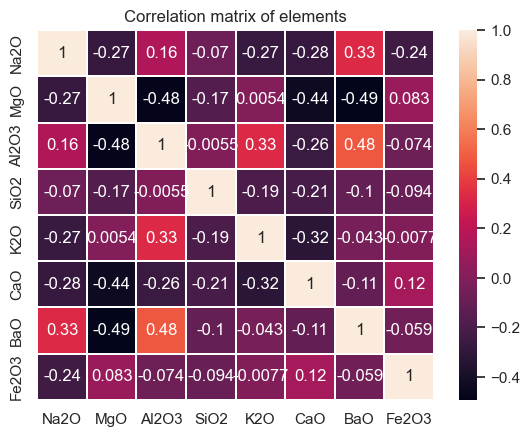

In [7]:
correlation_matrix = dataframe_molecules.corr()

sns.heatmap(correlation_matrix, annot=True, linewidths=0.3)
plt.title('Correlation matrix of elements')
plt.show()

Przygotowywanie danych do klasyfikacji

In [10]:
class ModelsData:
    X_train = None
    X_test = None
    y_train = None
    y_test = None
    models: dict[str, 'ModelsData'] = None

    def __init__(self, model_str, model_init) -> None:
        self.scalers: list = None
        self.accuracy: float = -1.0
        self.X_train_scaled = None
        self.X_test_scaled = None
        self.arguments_scaled: bool = False
        self.impl = None
        self.model_str: str = model_str
        self.model_init: callable = model_init
    
    @classmethod
    def set_optimal_scalers(cls, scalers: list, X, y, test_size, seed):
        ModelsData.X_train, ModelsData.X_test, ModelsData.y_train, ModelsData.y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        for list_scalers in scalers:
            if not isinstance(list_scalers, list):
                list_scalers = [list_scalers]
            
            x_train_maybe_scaled, x_test_maybe_scaled = ModelsData._scale_data(list_scalers, ModelsData.X_train, ModelsData.X_test)

            for model in ModelsData.models.values():
                if model.impl is None:
                    model.impl = model.model_init()    
                model.impl.fit(x_train_maybe_scaled, ModelsData.y_train)
                predictions = model.impl.predict(x_test_maybe_scaled)
                accuracy = accuracy_score(ModelsData.y_test, predictions)
                #print(f'{model} accuracy {accuracy:.5f} with preprocessing {list_scalers}')
                if (model.accuracy is None 
                        or accuracy > model.accuracy):
                    model.scalers = list_scalers
                    model.accuracy = accuracy    
                    model.X_train_scaled = x_train_maybe_scaled
                    model.X_test_scaled = x_test_maybe_scaled
                    model.arguments_scaled = list_scalers[0] is not None

    @classmethod
    def _scale_data(cls, scalers_to_apply, x_train, x_test) -> tuple[list, list]:
        X_train_maybe_scaled = x_train
        X_test_maybe_scaled = x_test

        if scalers_to_apply is not None:
            for scaler in scalers_to_apply:
                X_train_maybe_scaled = scaler.fit_transform(X_train_maybe_scaled) if scaler is not None else X_train_maybe_scaled
                X_test_maybe_scaled = scaler.transform(X_test_maybe_scaled) if scaler is not None else X_test_maybe_scaled
        
        return (X_train_maybe_scaled, X_test_maybe_scaled)

ModelsData.models = {'DTC': ModelsData('DecisionTreeClassifier', DecisionTreeClassifier),
          'KNN': ModelsData('KNeighborsClassifier', KNeighborsClassifier),
          'SVC': ModelsData('SVC', SVC),
          'LR': ModelsData('LogisticRegression', LogisticRegression),
          'GNB': ModelsData('GaussianNB', GaussianNB),
          'RFC': ModelsData('RandomForestClassifier', RandomForestClassifier)
          }

X = dataframe_molecules
y = dataframe['Type'] 
test_size = 0.2
seed = 42

scalers = [None, StandardScaler(), *[[StandardScaler(), PCA(n_components=i)] for i in range(1, X.shape[1] + 1)], *[PCA(n_components=i) for i in range(1, X.shape[1] + 1)], MinMaxScaler()]
ModelsData.set_optimal_scalers(scalers, X, y, test_size, seed)
for v in ModelsData.models.values():
    print(f'The best scaler for model {v.model_str} is {v.scalers} with accuracy {v.accuracy}')

c:\Users\kubas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The best scaler for model DecisionTreeClassifier is [StandardScaler(), PCA(n_components=5)] with accuracy 0.813953488372093
The best scaler for model KNeighborsClassifier is [StandardScaler(), PCA(n_components=3)] with accuracy 0.813953488372093
The best scaler for model SVC is [StandardScaler()] with accuracy 0.7209302325581395
The best scaler for model LogisticRegression is [None] with accuracy 0.7209302325581395
The best scaler for model GaussianNB is [PCA(n_components=7)] with accuracy 0.6511627906976745
The best scaler for model RandomForestClassifier is [StandardScaler(), PCA(n_components=3)] with accuracy 0.8372093023255814


KLASYFIKACJA
-----------------------------------

Przygotowanie funkcji

In [11]:
def show_accuracy(model: ModelsData):
    return accuracy_score(ModelsData.y_test, model.predictions)


def calculate_average_accuracy(model):
    accuracy = []
    for _ in range(50):
        accuracy.append(show_accuracy(model))
    mean = sum(accuracy) / len(accuracy)
    print('Accuracy:', mean)
    return mean

def train_model(model_str: str, grid_parameters, use_scaled: bool):
    model = ModelsData.models[model_str]
    print(f'Training model {model.model_str}')
    model_impl = model.model_init()
    X_train = model.X_train_scaled if use_scaled else ModelsData.X_train
    grid = GridSearchCV(model_impl, grid_parameters, n_jobs=-1, verbose=10)
    grid.fit(X_train, ModelsData.y_train)
    print(f'Best score: {grid.best_score_}')
    print(f'Best parameters: {grid.best_params_}')
    return grid.best_estimator_

def find_best_knn(use_scaled: bool=False):
    n_neighbors = np.arange(3, 5, 1)
    weights = ['uniform', 'distance']
    algorithm = ['ball_tree']
    leaf_size = np.arange(20, 30, 1)
    # metric = [DistanceMetric.get_metric('haversine')]
    metric = VALID_METRICS['ball_tree']
    # metric.remove('haversine')
    # metric.remove('mahalanobis')
    # metric.remove('seuclidean')
    # metric.remove('wminkowski')
    # metric.remove('pyfunc')
    n_jobs = [-1]

    grid_parameters = {
        'n_neighbors': n_neighbors,
        'weights': weights,
        'algorithm': algorithm,
        'leaf_size': leaf_size,
        'metric': metric,
        'n_jobs': n_jobs
    }

    return train_model('KNN', grid_parameters, use_scaled)

# def find_best_tree():
#     criterion = ['gini', 'entropy']
#     splitter = ['best', 'random']
#     min_samples_split = np.arange(2, 5, 1)
#     min_samples_leaf = np.arange(1, 5, 1)
#     max_features = ['sqrt', 'log2']


def find_best_svc(use_scaled: bool=False):
    C = [0.1, 1, 10, 100, 100]
    kernel = ['linear', 'rbf', 'poly']
    degree = np.arange(2, 6, 1)
    gamma = ['scale', 'auto', 0.1, 1, 10, 100]
    #coef0 = np.arange(0, 2, 0.2)
    class_weight = ['balanced', None]
    grid_parameters = {
        'C': C,
        'kernel': kernel,
        'degree': degree,
        'gamma': gamma,
        #'coef0': coef0,
        'class_weight': class_weight
    }

    return train_model('SVC', grid_parameters, use_scaled)


# Całiem słaby algorytm gdyż zakłada wzajemną niezależność zmiennych,
# co w przypadku inżynierii materiałowej (przy produkcji szkła) jest kompletnie bez sensu
def find_best_gaussianNB(use_scaled: bool=False):
    priors = ['']
    var_smoothing = [1e-7, 5e-7, 1e-8, 5e-8, 1e-9, 5e-9, 1e-10]
    grid_parameters = {
        'var_smoothing': var_smoothing
    }

    return train_model('GNB', grid_parameters, use_scaled)


def find_best_logistic_regression(use_scaled: bool=False):
    penalty = ['l2']
    dual = [False]
    tol = [1e-1, 5e-1, 1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4, 1e-5, 5e-5]
    C = [0.1, 0.2, 0.3, 0.4, 0.5]
    solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    grid_parameters = {
        'penalty': penalty,
        'dual': dual,
        'tol': tol,
        'C': C,
        'solver': solver
    }
    
    return train_model('LR', grid_parameters, use_scaled)

def find_best_decision_tree(use_scaled: bool=False):
    criterion = ['gini', 'entropy']
    max_depth = [i for i in range(1, 30)]
    # max_depth = [3, 5]
    min_samples_split = [2, 4]
    min_samples_leaf = [1, 2]

    grid_parameters = {
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf
    }

    return train_model('DTC', grid_parameters, use_scaled)

def find_best_random_forest(use_scaled: bool=False):
    criterion = ['gini', 'entropy']
    max_depth = [i for i in range(80, 110, 10)]
    min_samples_split = [1, 2, 3, 4]
    min_samples_leaf = [1, 2, 3, 4]
    max_features =['sqrt', 'log2', None]
    n_jobs = [-1]

    grid_parameters = {
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'n_jobs': n_jobs,
    }

    return train_model('RFC', grid_parameters, use_scaled)

Wyznaczenie optymalnych modeli

In [13]:
# Funkcje do znalezienia potencjalnie najlepszego modelu
# UWAGA: Komputer może mocno zwolnić po uruchomieniu wszystkich naraz
def find_best_models(use_scaled: bool):
    print(f'Finding best models using {"scaled" if use_scaled else "non scaled"} data')
    best_svc = find_best_svc(use_scaled=use_scaled)
    best_lr = find_best_logistic_regression(use_scaled=use_scaled)
    best_gnb = find_best_gaussianNB(use_scaled=use_scaled)
    best_dt = find_best_decision_tree(use_scaled=use_scaled)
    best_rf = find_best_random_forest(use_scaled=use_scaled)

find_best_models(True)
find_best_models(False)


Finding best models using scaled data
Training model SVC
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


KeyboardInterrupt: 

Utworzenie optymalnych modeli

In [20]:
def validate_model(model_str: str, use_scaled: bool):
    model = ModelsData.models[model_str]
    if use_scaled:
        print(f'Validating model {model_str} using scaled data')
        _validate_model(model.impl, model.X_train_scaled, model.X_test_scaled)
    else:
        print(f'Validating model {model_str} using non scaled data')
        _validate_model(model.impl, ModelsData.X_train, ModelsData.X_test)

def _validate_model(model, X_train, X_test):
    name = str(model).split(sep='(', maxsplit=1)[0]

    # walidacja krzyżowa
    model.fit(X_train, ModelsData.y_train)
    pred = model.predict(X_test)
    score = round(accuracy_score(ModelsData.y_test, pred), ndigits=4)
    print(f'{name} \n')
    print('Report of confusion matrix')
    report = classification_report(ModelsData.y_test, pred, digits=4)
    print(report)
    validation = cross_val_score(model, X, y, cv=3)
    print(validation.mean(), validation.std() * 2)
    print('Chart of confusion matrix')
    ConfusionMatrixDisplay.from_estimator(model, X_test, ModelsData.y_test)
    plt.title(label=(name + f' (score: {score})'))
    plt.show()

# ============= non Scaled =============
# Finding best models using non scaled data
# Training model SVC
# Fitting 5 folds for each of 264 candidates, totalling 1320 fits
# Best score: 0.6963025210084033
# Best parameters: {'C': 256, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
# Training model LogisticRegression
# Fitting 5 folds for each of 250 candidates, totalling 1250 fits
# Best score: 0.5789915966386554
# Best parameters: {'C': 0.3, 'dual': False, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.5}
# Training model GaussianNB
# Fitting 5 folds for each of 7 candidates, totalling 35 fits
# Best score: 0.40369747899159664
# Best parameters: {'var_smoothing': 1e-07}
# Training model DecisionTreeClassifier
# Fitting 5 folds for each of 16 candidates, totalling 80 fits
# Best score: 0.6610084033613445
# Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
# Training model RandomForestClassifier
# Fitting 5 folds for each of 288 candidates, totalling 1440 fits
# Best score: 0.7245977011494253
# Best parameters: {'criterion': 'gini', 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_jobs': -1}

# ============= Scaled =============
# Finding best models using scaled data
# Training model SVC
# Fitting 5 folds for each of 264 candidates, totalling 1320 fits
# Best score: 0.6611764705882354
# Best parameters: {'C': 16, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
# Training model LogisticRegression
# Fitting 5 folds for each of 250 candidates, totalling 1250 fits
# Best score: 0.5966386554621849
# Best parameters: {'C': 0.5, 'dual': False, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.05}
# Training model GaussianNB
# Fitting 5 folds for each of 7 candidates, totalling 35 fits
# Best score: 0.40369747899159664
# Best parameters: {'var_smoothing': 5e-07}
# Training model DecisionTreeClassifier
# Fitting 5 folds for each of 16 candidates, totalling 80 fits
# Best score: 0.6489075630252101
# Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
# Training model RandomForestClassifier
# Fitting 5 folds for each of 288 candidates, totalling 1440 fits
# Best score: 0.7377011494252873
# Best parameters: {'criterion': 'gini', 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_jobs': -1}

use_scaled = True
ModelsData.models['KNN'].impl = KNeighborsClassifier(algorithm='ball_tree', leaf_size=28, metric='hamming', n_jobs=-1, n_neighbors=9, weights='uniform') if use_scaled \
    else KNeighborsClassifier(algorithm='ball_tree', leaf_size=28, metric='hamming', n_jobs=-1, n_neighbors=9, weights='uniform')

ModelsData.models['SVC'].impl = SVC(C=16, class_weight=None, gamma='scale', kernel='rbf') if use_scaled \
    else SVC(C=256, class_weight=None, gamma='auto', kernel='rbf')

ModelsData.models['LR'].impl = LogisticRegression(C=0.5, dual= False, penalty='l2', solver='sag', tol=0.05) if use_scaled \
    else LogisticRegression(C=0.3, dual= False, penalty='l2', solver='newton-cg', tol=0.5)

ModelsData.models['GNB'].impl = GaussianNB(var_smoothing=5e-07) if use_scaled \
    else GaussianNB(var_smoothing=1e-7)

ModelsData.models['DTC'].impl = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, min_samples_split=2) \
 if use_scaled else DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=2)

ModelsData.models['RFC'].impl = RandomForestClassifier(criterion='gini', max_depth=90, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, n_jobs=-1) \
 if use_scaled else RandomForestClassifier(criterion='gini', max_depth=90, max_features='sqrt', min_samples_leaf=2, min_samples_split=3, n_jobs=-1)


for best_model in ModelsData.models.keys():
    validate_model(best_model, use_scaled)

Validating model DTC using scaled data
DecisionTreeClassifier 

Report of confusion matrix


c:\Users\kubas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kubas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kubas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1     0.6667    0.9091    0.7692        11
           2     0.7143    0.7143    0.7143        14
           3     0.0000    0.0000    0.0000         3
           5     1.0000    0.5000    0.6667         4
           6     0.6667    0.6667    0.6667         3
           7     0.8889    1.0000    0.9412         8

    accuracy                         0.7442        43
   macro avg     0.6561    0.6317    0.6263        43
weighted avg     0.7080    0.7442    0.7130        43



c:\Users\kubas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
